### New
Instead of using CAMB to compute the distance modulus, I directly integrate the Hubble function.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import emcee

import sys
sys.path.append("../")
from pyACC.cosmology import Dc_w0waCDM

### Why Direct Substitution is Incorrect

Inserting $w(z) = w_0 + w_a \frac{z}{1+z}$ directly into the Hubble parameter expression without proper integration will not capture the correct evolution of dark energy. The correct approach requires integrating the varying equation of state to accurately reflect its impact on the dark energy density.

#### Derivation with Variable $w(z)$

For a time-varying $w(z)$, the dark energy density evolves as:

$$
\rho_\Lambda(z) = \rho_{\Lambda 0} \exp \left( 3 \int_0^z \frac{1 + w(z')}{1 + z'} \, dz' \right)
$$

Given $w(z) = w_0 + w_a \frac{z}{1+z}$, the integral becomes:

$$
\int_0^z \frac{1 + w(z')}{1 + z'} \, dz' = \int_0^z \frac{1 + w_0 + w_a \frac{z'}{1 + z'}}{1 + z'} \, dz'
$$

Evaluating this integral:

$$
\int_0^z \frac{1 + w_0 + w_a \frac{z'}{1 + z'}}{1 + z'} \, dz' = (1 + w_0) \ln(1 + z) + w_a \frac{z}{1 + z}
$$

Thus, the dark energy density can be written as:

$$
\rho_\Lambda(z) = \rho_{\Lambda 0} (1+z)^{3(1+w_0)} \exp \left( 3 w_a \frac{z}{1+z} \right)
$$

#### Correct Expression for $H(z)$

Incorporating this into the Hubble parameter, we get:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + \Omega_\Lambda (1+z)^{3(1+w_0)} \exp \left( 3 w_a \frac{z}{1+z} \right)}
$$

For a flat universe ($\Omega_k = 0$), where $\Omega_\Lambda = 1 - \Omega_m - \Omega_r$, this simplifies to:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1 - \Omega_m - \Omega_r) (1+z)^{3(1+w_0)} \exp \left( 3 w_a \frac{z}{1+z} \right)}
$$

#### Why Direct Substitution is Incorrect

Directly substituting $w = w_0 + w_a (1 - a)$ into:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1 - \Omega_m - \Omega_r) (1+z)^{3(1+w)}}
$$

would give:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1 - \Omega_m - \Omega_r) (1+z)^{3(1+w_0 + w_a (1 - a))}}
$$

This approach ignores the integral needed to correctly account for the varying $w(z)$ over time. The exponential factor $\exp \left( 3 w_a \frac{z}{1+z} \right)$ from proper integration is crucial for accurately describing the effects of the time-varying equation of state.


The Hubble parameter $ H(z) $ for the $w_0 w_a$ CDM model is given by:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_k (1+z)^2 + \Omega_{\Lambda} \exp\left[ 3 \int_0^z \frac{w(z')}{1+z'} \, dz' \right]}
$$

where the dark energy equation of state $ w(z) $ is:

$$
w(z) = w_0 + w_a \frac{z}{1+z}
$$

and

$$
3 \int_0^z \frac{w(z')}{1+z'} \, dz' = 3 \left[ w_0 \ln(1+z) - w_a \frac{z}{1+z} \right]
$$

Thus, the Hubble parameter becomes:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_k (1+z)^2 + \Omega_{\Lambda} (1+z)^{3(1+w_0 + w_a)} \exp \left(-3 w_a \frac{z}{1+z} \right)}
$$

$\rightarrow$

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1-\Omega_{m}-\Omega_{r}) (1+z)^{3(1+w_0 + w_a)} \exp \left(-3 w_a \frac{z}{1+z} \right)}
$$

In [18]:
#'''
def hubble_function(z,Omega_m,Omega_r,w0,wa,H0):
    DE_contribution=(1+z)**(3*(1+w0+wa))*np.exp(-3*wa*z/(1+z))
    return H0*np.sqrt(Omega_m*(1+z)**3+Omega_r*(1+z)**4+(1-Omega_m-Omega_r)*DE_contribution)#(1+z)**(3*(1+w0+wa))*np.exp(-3*wa*z/(1+z)))
#'''
'''
def hubble_function(z, Omega_m, Omega_r, w0, wa, H0):
    # Calculate the dark energy contribution
    dark_energy_contribution = (1 + z)**(3 * (1 + w0 + wa)) * np.exp(-3 * wa * z / (1 + z))
    
    # Calculate H(z)
    Hz = H0 * np.sqrt(
        Omega_m * (1 + z)**3 +
        Omega_r * (1 + z)**4 +
        (1-Omega_m-Omega_r) * dark_energy_contribution
    )
    
    return Hz
'''
'''
#chat GPT suggests:
def hubble_function(z, H0, Omega_m, Omega_r, w0, wa):
    # Calculate the dark energy density parameter Omega_Lambda
    Omega_Lambda = 1 - Omega_m - Omega_r
    
    # Calculate the integral term for the evolving dark energy
    integral_term = 3 * (1+w0 + wa) * np.log(1 + z) - 3 * wa * z / (1 + z)
    
    # Calculate the Hubble parameter
    return H0 * np.sqrt(
        Omega_m * (1 + z)**3 + 
        Omega_r * (1 + z)**4 + 
        Omega_Lambda * (1 + z)**integral_term
    )
'''

'\n#chat GPT suggests:\ndef hubble_function(z, H0, Omega_m, Omega_r, w0, wa):\n    # Calculate the dark energy density parameter Omega_Lambda\n    Omega_Lambda = 1 - Omega_m - Omega_r\n    \n    # Calculate the integral term for the evolving dark energy\n    integral_term = 3 * (1+w0 + wa) * np.log(1 + z) - 3 * wa * z / (1 + z)\n    \n    # Calculate the Hubble parameter\n    return H0 * np.sqrt(\n        Omega_m * (1 + z)**3 + \n        Omega_r * (1 + z)**4 + \n        Omega_Lambda * (1 + z)**integral_term\n    )\n'

### File

In [19]:
file_path = 'lcparam_full_long.txt' #'lcparam_full_long.txt' #'lcparam_DS17f.txt'

with open(file_path, 'r') as file:
    header_line = file.readline().strip()
    header = header_line.lstrip('#').strip()

header_words = header.split()
header_words.pop()
header = ' '.join(header_words)

data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)
data.columns = header.split()

z_data = data['zcmb'].values
mb = data['mb'].values #B-band peak magnitude
dmb = data['dmb'].values

Sigma = np.diag(dmb**2)
Sigma_inv = np.linalg.inv(Sigma)

### Relationship Between Hubble Function and Distance Modulus

1. **Luminosity Distance $d_L(z)$**

   The luminosity distance $d_L(z)$ is given by:

   $$
   d_L(z) = (1+z) \int_0^z \frac{dz'}{H(z')}.
   $$

   For the Hubble parameter $H(z)$ in the $w_0w_a$ CDM model:

   $$
   H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1 - \Omega_m - \Omega_r) (1+z)^{3(w_0 + w_a)} \exp\left(-3 w_a \frac{z}{1+z}\right)},
   $$

   you can plug this into the integral to find $d_L(z)$.

2. **Distance Modulus $\mu(z)$**

   The distance modulus $\mu(z)$ is given by:

   $$
   \mu(z) = 5 \log_{10}(d_L(z)) + 25.
   $$

### Summary

- **Compute the Luminosity Distance:**
  
  Integrate the inverse of $H(z)$:

  $$
  d_L(z) = (1+z) \int_0^z \frac{dz'}{H(z')}.
  $$

- **Compute the Distance Modulus:**
  
  Once $d_L(z)$ is computed, use:

  $$
  \mu(z) = 5 \log_{10}(d_L(z)) + 25.
  $$

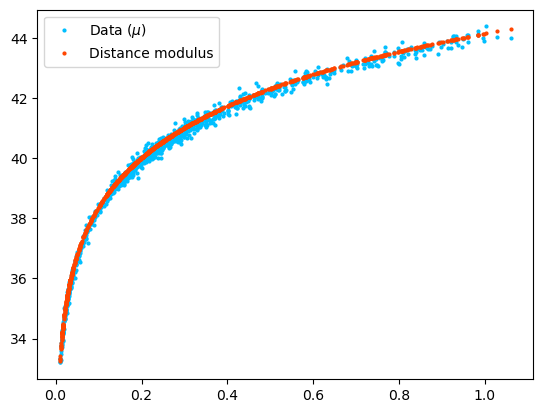

In [20]:
def get_mu(z,H0,Omega_m,Omega_r,w0,wa):
    #z=np.linspace(np.min(z),np.max(z),1000)
    comoving_distance=[]
    distance_modulus=[]
    for i in range(len(z)):
        comoving_distance.append(Dc_w0waCDM(hubble_function,z[i],Omega_m,Omega_r,w0,wa,H0))
        distance_modulus.append(5*np.log10(comoving_distance[i]*(1+z[i]))+25)
    return np.array(distance_modulus)

#distance modulus of the data: mu_data=mb-M with M the absolute magnitude of a type Ia supernova, so M=-19.3
M=-19.3
mu_data=mb-M

plt.plot(z_data,mu_data,'o',markersize=2,color='deepskyblue',label='Data ($\mu$)')
plt.plot(z_data,get_mu(z_data,68,0.319,0,-1,0),'o',markersize=2,color='orangered',label='Distance modulus')
plt.legend()
plt.show()

### Prior

In [21]:
def log_prior(params):
    H0, Omega_m, Omega_r, w0, wa = params
    if 0 < H0 < 100 or 0 < Omega_m < 1 or -1e-3 < Omega_r < 1 or -2 < w0 < 0 or -2 < wa < 2:
        return 0
    '''
    if 0 < H0 < 100:
        print('H0')
        return 0
    if 0 < Omega_m < 1:
        print('Omega_m')
        return 0
    if 0 < Omega_r < 1:
        print('Omega_r')
        return 0
    if -3 < w0 < 0:
        print('w0')
        return 0
    if -3 < wa < 3:
        print('wa')
        return 0
    '''
    return -np.inf

### Likelihood

In [22]:
def log_likelihood(params,z,d,cov_inv):
    H0,Omega_m,Omega_r,w0,wa=params
    '''
    if not 65<H0<75:
        print(f"H0 out of bounds: {H0}")
        return -np.inf
    '''
    #'''
    if Omega_m<0:
        #print(f"Omega_m out of bounds: {Omega_m}")
        return -np.inf
    if Omega_r<0:
        #print(f"Omega_r out of bounds: {Omega_r}")
        return -np.inf
    #'''
    '''
    if not -2<w0<0:
        print(f"w0 out of bounds: {w0}")
        return -np.inf
    if not -2<wa<2:
        print(f"wa out of bounds: {wa}")
        return -np.inf
    '''
    mu=get_mu(z,H0,Omega_m,Omega_r,w0,wa)
    diff=d-mu
    #return -0.5 * diff @ cov_inv @ diff
    term1 = -0.5 * diff @ cov_inv @ diff
    term2 = 0.5 * ((np.ones_like(diff) @ cov_inv @ diff) ** 2) / (np.ones_like(diff) @ cov_inv @ np.ones_like(diff))
    #return term1 + term2
    if len(z)==len(z_data):
        return term1+term2
    else:
        return term1

### Posterior

In [23]:
def log_posterior(params,z,d,cov_inv):
    prior = log_prior(params)
    if np.isfinite(prior):
        return prior + log_likelihood(params,z,d,cov_inv)
    return prior

### $\chi^2$

In [24]:
def chi(params,z,d,cov_inv):
    return -2*log_posterior(params,z,d,cov_inv)

### Parameter Optimization

In [25]:
initial_guess = [68, 0.319, 0, -1, 0]

#result = minimize(lambda params: -log_likelihood(params,z_data,mu_data,Sigma_inv), initial_guess, method='Powell')
result = minimize(chi, initial_guess, args=(z_data, mu_data, Sigma_inv), method='Powell')
best_fit_params = result.x

mu_model_best = get_mu(z_data, *best_fit_params)

/Users/marigalla/anaconda3/envs/acc-env/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2577: RuntimeWarning: invalid value encountered in scalar multiply
  tmp2 = (x - v) * (fx - fw)


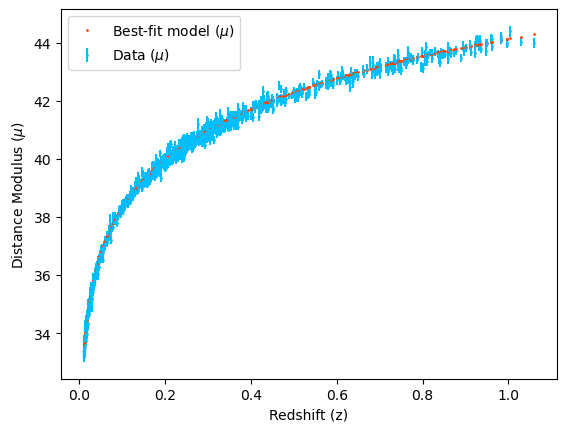

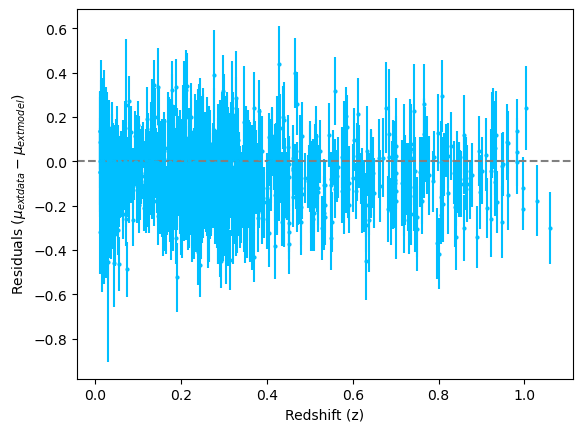

--------------------------------------
Best-fit parameters:
H0: 69.90473344552315
Omega_m: 0.272918974361876
Omega_r: 5.873789574936401e-08
w0: -1.132811807108433
wa: 0.8428108884844462
--------------------------------------
Chi-square: 1011.0368466880133
Degrees of freedom: 1017
Reduced chi-square: 0.9941365257502589
--------------------------------------


In [26]:
plt.errorbar(z_data, mu_data, yerr=dmb, fmt='o', markersize=1, color='deepskyblue', label='Data ($\mu$)')
plt.plot(z_data, mu_model_best, 'o', markersize=1, color='orangered', label='Best-fit model ($\mu$)')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus ($\mu$)')
plt.legend()
plt.show()

residuals = mu_data - mu_model_best
plt.errorbar(z_data, residuals, yerr=dmb, fmt='o', markersize=2, color='deepskyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Redshift (z)')
plt.ylabel('Residuals ($\mu_{\text{data}} - \mu_{\text{model}}$)')
plt.show()

print("--------------------------------------")
print("Best-fit parameters:")
print("H0:", best_fit_params[0])
print("Omega_m:", best_fit_params[1])
print("Omega_r:", best_fit_params[2])
print("w0:", best_fit_params[3])
print("wa:", best_fit_params[4])
print("--------------------------------------")
chi2 = -2 * log_posterior(best_fit_params, z_data, mu_data, Sigma_inv)
print("Chi-square:", chi2)
print("Degrees of freedom:", len(z_data) - len(best_fit_params))
print("Reduced chi-square:", chi2 / (len(z_data) - len(best_fit_params)))
print("--------------------------------------")

## $z<0.4$

In [27]:
#array with all the redshift in z_data < 0.4
z_data_low=[]
mu_data_low=[]
dmb_low=[]
for i in range(len(z_data)):
    if z_data[i]<0.4:
        z_data_low.append(z_data[i])
        mu_data_low.append(mu_data[i])
        dmb_low.append(dmb[i])

#array with all the redshift in z_data > 0.4
z_data_high=[]
mu_data_high=[]
dmb_high=[]
for i in range(len(z_data)):
    if z_data[i]>0.4:
        z_data_high.append(z_data[i])
        mu_data_high.append(mu_data[i])
        dmb_high.append(dmb[i])

z_data_low=np.array(z_data_low)
mu_data_low=np.array(mu_data_low)
dmb_low=np.array(dmb_low)

z_data_high=np.array(z_data_high)
mu_data_high=np.array(mu_data_high)
dmb_high=np.array(dmb_high)

#covariance matrix
Sigma_low = np.diag(dmb_low**2)
Sigma_inv_low = np.linalg.inv(Sigma_low)

Sigma_high = np.diag(dmb_high**2)
Sigma_inv_high = np.linalg.inv(Sigma_high)

/Users/marigalla/anaconda3/envs/acc-env/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2577: RuntimeWarning: invalid value encountered in scalar multiply
  tmp2 = (x - v) * (fx - fw)


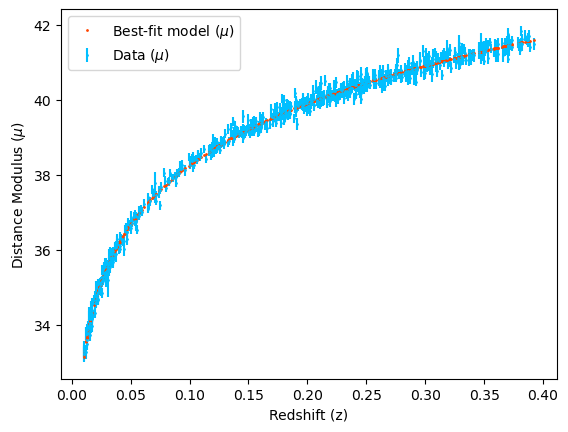

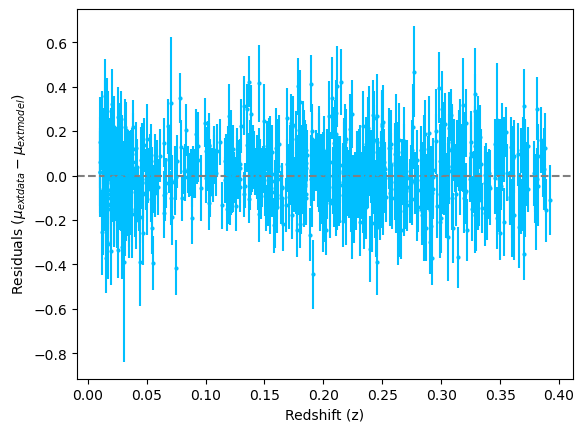

--------------------------------------
Best-fit parameters (low redshift):
H0: 71.91693146575545
Omega_m: 0.296013437228261
Omega_r: 0.0005211295184393332
w0: -1.0062248619122212
wa: -0.5265546667555071
--------------------------------------
Chi-square (low redshift): 782.1823432336212
Degrees of freedom (low redshift): 761
Reduced chi-square (low redshift): 1.0278348794134313
--------------------------------------


In [28]:
result_low = minimize(chi, initial_guess, args=(z_data_low, mu_data_low, Sigma_inv_low), method='Powell')
best_fit_params_low = result_low.x

mu_model_best_low = get_mu(z_data_low, *best_fit_params_low)

plt.errorbar(z_data_low, mu_data_low, yerr=dmb_low, fmt='o', markersize=1, color='deepskyblue', label='Data ($\mu$)')
plt.plot(z_data_low, mu_model_best_low, 'o', markersize=1, color='orangered', label='Best-fit model ($\mu$)')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus ($\mu$)')
plt.legend()
plt.show()

residuals_low = mu_data_low - mu_model_best_low
plt.errorbar(z_data_low, residuals_low, yerr=dmb_low, fmt='o', markersize=2, color='deepskyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Redshift (z)')
plt.ylabel('Residuals ($\mu_{\text{data}} - \mu_{\text{model}}$)')
plt.show()

print("--------------------------------------")
print("Best-fit parameters (low redshift):")
print("H0:", best_fit_params_low[0])
print("Omega_m:", best_fit_params_low[1])
print("Omega_r:", best_fit_params_low[2])
print("w0:", best_fit_params_low[3])
print("wa:", best_fit_params_low[4])
print("--------------------------------------")
chi2_low = -2 * log_likelihood(best_fit_params_low, z_data_low, mu_data_low, Sigma_inv_low)
print("Chi-square (low redshift):", chi2_low)
print("Degrees of freedom (low redshift):", len(z_data_low) - len(best_fit_params_low))
print("Reduced chi-square (low redshift):", chi2_low / (len(z_data_low) - len(best_fit_params_low)))
print("--------------------------------------")

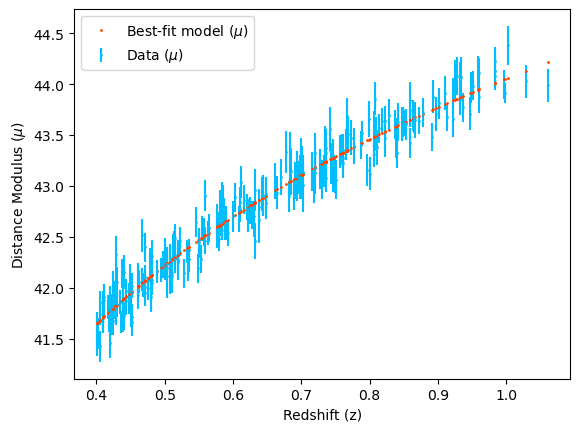

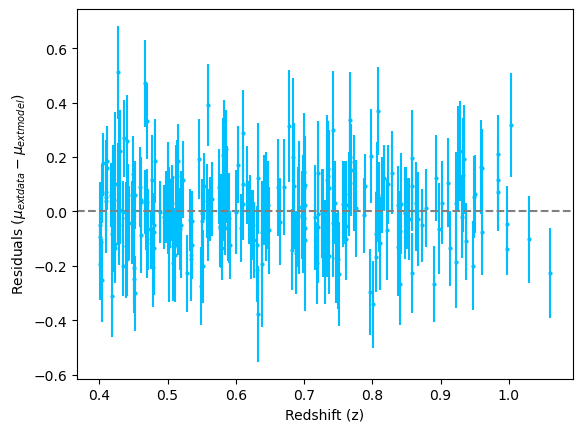

--------------------------------------
Best-fit parameters (high redshift):
H0: 70.7569830050498
Omega_m: 0.31825434069378783
Omega_r: 0.0
w0: -0.9981599648870518
wa: -0.020943117834185038
--------------------------------------
Chi-square (high redshift): 230.89940026230587
Degrees of freedom (high redshift): 251
Reduced chi-square (high redshift): 0.9199179293318959
--------------------------------------


In [29]:
result_high = minimize(chi, initial_guess, args=(z_data_high, mu_data_high, Sigma_inv_high), method='Powell')
best_fit_params_high = result_high.x

mu_model_best_high = get_mu(z_data_high, *best_fit_params_high)

plt.errorbar(z_data_high, mu_data_high, yerr=dmb_high, fmt='o', markersize=1, color='deepskyblue', label='Data ($\mu$)')
plt.plot(z_data_high, mu_model_best_high, 'o', markersize=1, color='orangered', label='Best-fit model ($\mu$)')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus ($\mu$)')
plt.legend()
plt.show()

residuals_high = mu_data_high - mu_model_best_high
plt.errorbar(z_data_high, residuals_high, yerr=dmb_high, fmt='o', markersize=2, color='deepskyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Redshift (z)')
plt.ylabel('Residuals ($\mu_{\text{data}} - \mu_{\text{model}}$)')
plt.show()

print("--------------------------------------")
print("Best-fit parameters (high redshift):")
print("H0:", best_fit_params_high[0])
print("Omega_m:", best_fit_params_high[1])
print("Omega_r:", best_fit_params_high[2])
print("w0:", best_fit_params_high[3])
print("wa:", best_fit_params_high[4])
print("--------------------------------------")
chi2_high = -2 * log_likelihood(best_fit_params_high, z_data_high, mu_data_high, Sigma_inv_high)
print("Chi-square (high redshift):", chi2_high)
print("Degrees of freedom (high redshift):", len(z_data_high) - len(best_fit_params_high))
print("Reduced chi-square (high redshift):", chi2_high / (len(z_data_high) - len(best_fit_params_high)))
print("--------------------------------------")

## MCMC

In [30]:
'''
#Monte Carlo Markov Chain
n_walkers = 100
n_steps = 1000
n_params = len(initial_guess)
walkers = np.random.randn(n_walkers, n_params) * 1e-4 + initial_guess

for i in range(n_walkers):
    walkers[i] = result.x

chain = np.zeros((n_walkers, n_steps, n_params))
chain[:, 0, :] = walkers

for i in range(1, n_steps):
    for j in range(n_walkers):
        current_params = chain[j, i - 1, :]
        proposed_params = current_params + np.random.randn(n_params) * 0.1
        log_prob_current = log_posterior(current_params, z_data, mu_data, Sigma_inv)
        log_prob_proposed = log_posterior(proposed_params, z_data, mu_data, Sigma_inv)
        
        if log_prob_proposed > log_prob_current:
            chain[j, i, :] = proposed_params
        else:
            accept_prob = np.exp(log_prob_proposed - log_prob_current)
            if np.random.rand() < accept_prob:
                chain[j, i, :] = proposed_params
            else:
                chain[j, i, :] = current_params

# Plot the chains
for i in range(n_params):
    plt.figure()
    for j in range(n_walkers):
        plt.plot(chain[j, :, i], alpha=0.5)
    plt.xlabel('Step')
    plt.ylabel(f'Parameter {i}')
    plt.show()
'''

"\n#Monte Carlo Markov Chain\nn_walkers = 100\nn_steps = 1000\nn_params = len(initial_guess)\nwalkers = np.random.randn(n_walkers, n_params) * 1e-4 + initial_guess\n\nfor i in range(n_walkers):\n    walkers[i] = result.x\n\nchain = np.zeros((n_walkers, n_steps, n_params))\nchain[:, 0, :] = walkers\n\nfor i in range(1, n_steps):\n    for j in range(n_walkers):\n        current_params = chain[j, i - 1, :]\n        proposed_params = current_params + np.random.randn(n_params) * 0.1\n        log_prob_current = log_posterior(current_params, z_data, mu_data, Sigma_inv)\n        log_prob_proposed = log_posterior(proposed_params, z_data, mu_data, Sigma_inv)\n        \n        if log_prob_proposed > log_prob_current:\n            chain[j, i, :] = proposed_params\n        else:\n            accept_prob = np.exp(log_prob_proposed - log_prob_current)\n            if np.random.rand() < accept_prob:\n                chain[j, i, :] = proposed_params\n            else:\n                chain[j, i, :] =

In [54]:
# Initialize the MCMC sampler
initial = np.array([68, 0.319, 0, -1, 0])
ndim = len(initial)
nwalkers = 10
#pos = initial + 1e-1 * np.random.randn(nwalkers, ndim)

# Separate standard deviations for different parameter groups
std_H0_Om0_Omr = 1e-2
std_w0_wa = 1e-2

# Create the initial positions with different standard deviations
pos = np.empty((nwalkers, ndim))
pos[:, 0] = initial[0] + std_H0_Om0_Omr * np.random.randn(nwalkers)
pos[:, 1] = initial[1] + std_H0_Om0_Omr * np.random.randn(nwalkers)
pos[:, 2] = initial[2] + std_H0_Om0_Omr * np.random.randn(nwalkers)
pos[:, 3] = initial[3] + std_w0_wa * np.random.randn(nwalkers)
pos[:, 4] = initial[4] + std_w0_wa * np.random.randn(nwalkers)


#'''
# Check initial likelihoods
for i in range(nwalkers):
    print(log_likelihood(pos[i], z_data, mu_data, Sigma_inv))

# Check initial posteriors
for i in range(nwalkers):
    print(log_posterior(pos[i], z_data, mu_data, Sigma_inv))
#'''

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(z_data, mu_data, Sigma_inv))

-510.7957333507227
-inf
-inf
-inf
-512.5022374226004
-513.5210406381839
-513.5863448566698
-inf
-510.2662715501925
-inf
-510.7957333507227
-inf
-inf
-inf
-512.5022374226004
-513.5210406381839
-513.5863448566698
-inf
-510.2662715501925
-inf


In [55]:
# Run the MCMC sampler
nsteps = 200
sampler.run_mcmc(pos, nsteps, progress=True)

# Get the samples
samples = sampler.get_chain(discard=10,thin=10,flat=True)


100%|██████████| 200/200 [01:52<00:00,  1.78it/s]


### Plot

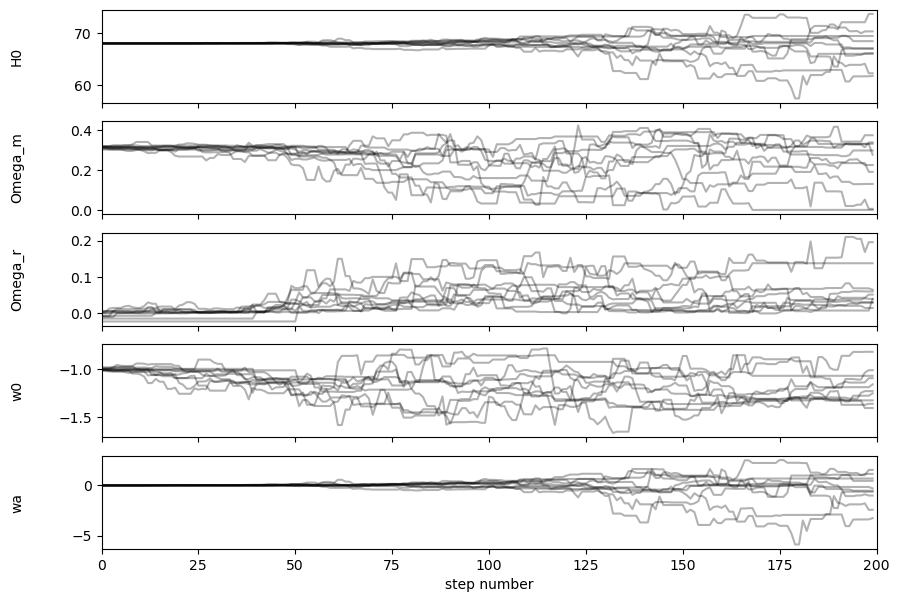

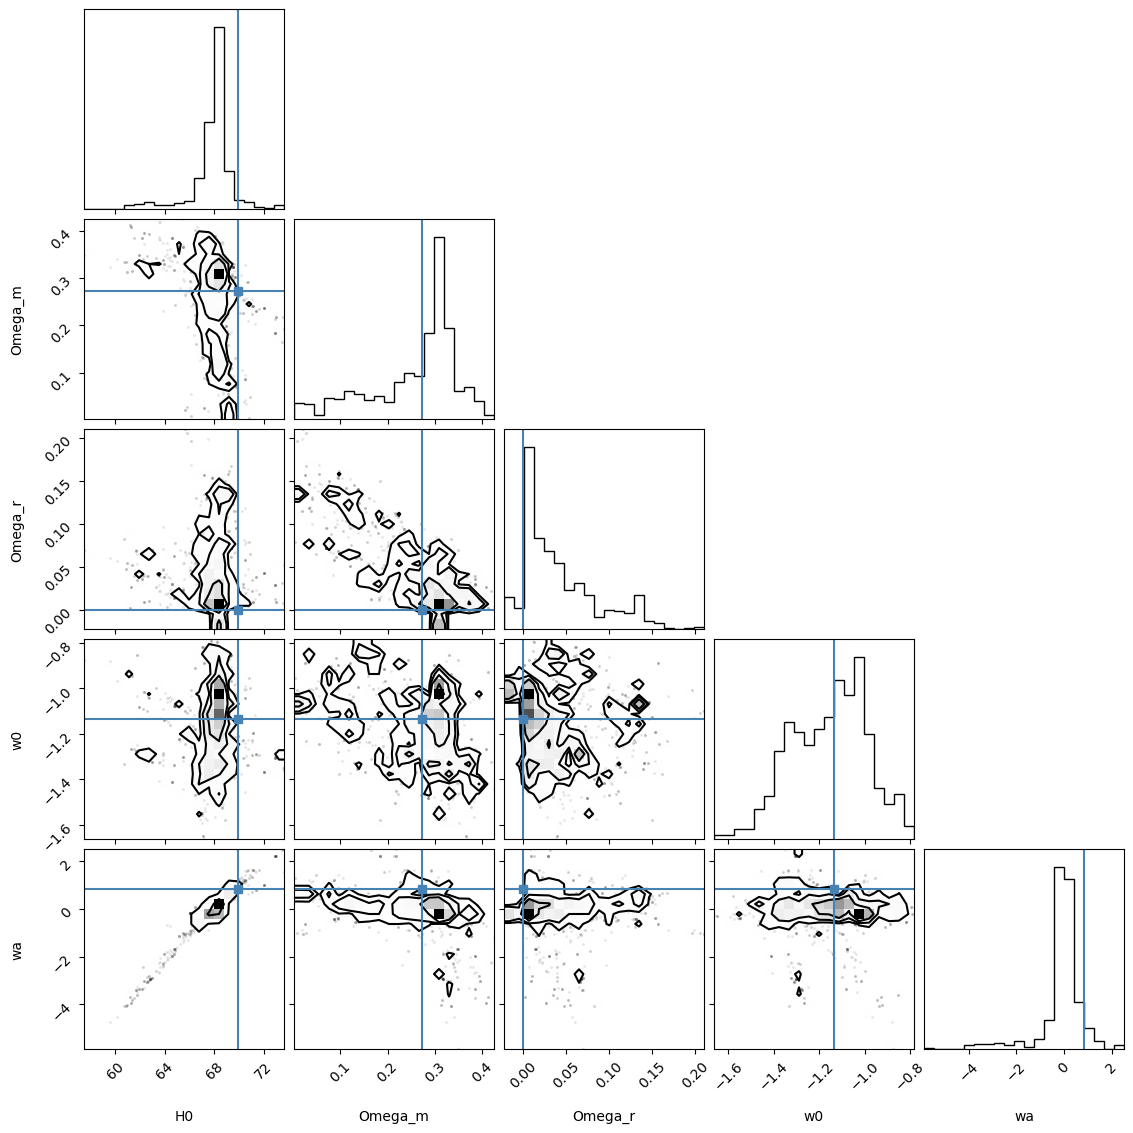

In [61]:
reshaped_samples = samples.reshape(-1, samples.shape[-1])
#plot the chains for each parameter
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["H0", "Omega_m", "Omega_r", "w0", "wa"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")
plt.show()

#plot the corner plot
import corner
fig = corner.corner(reshaped_samples, labels=labels, truths=best_fit_params)
plt.show()

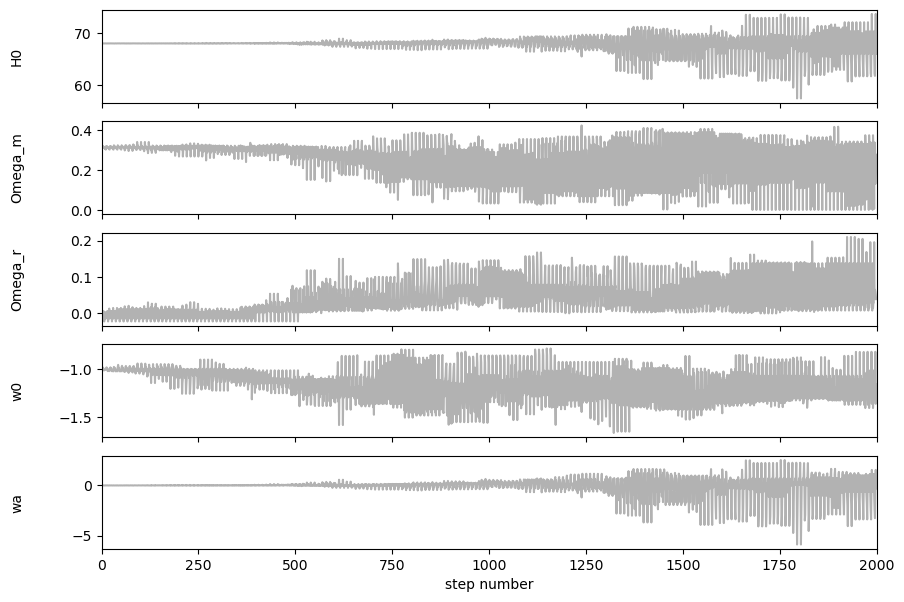

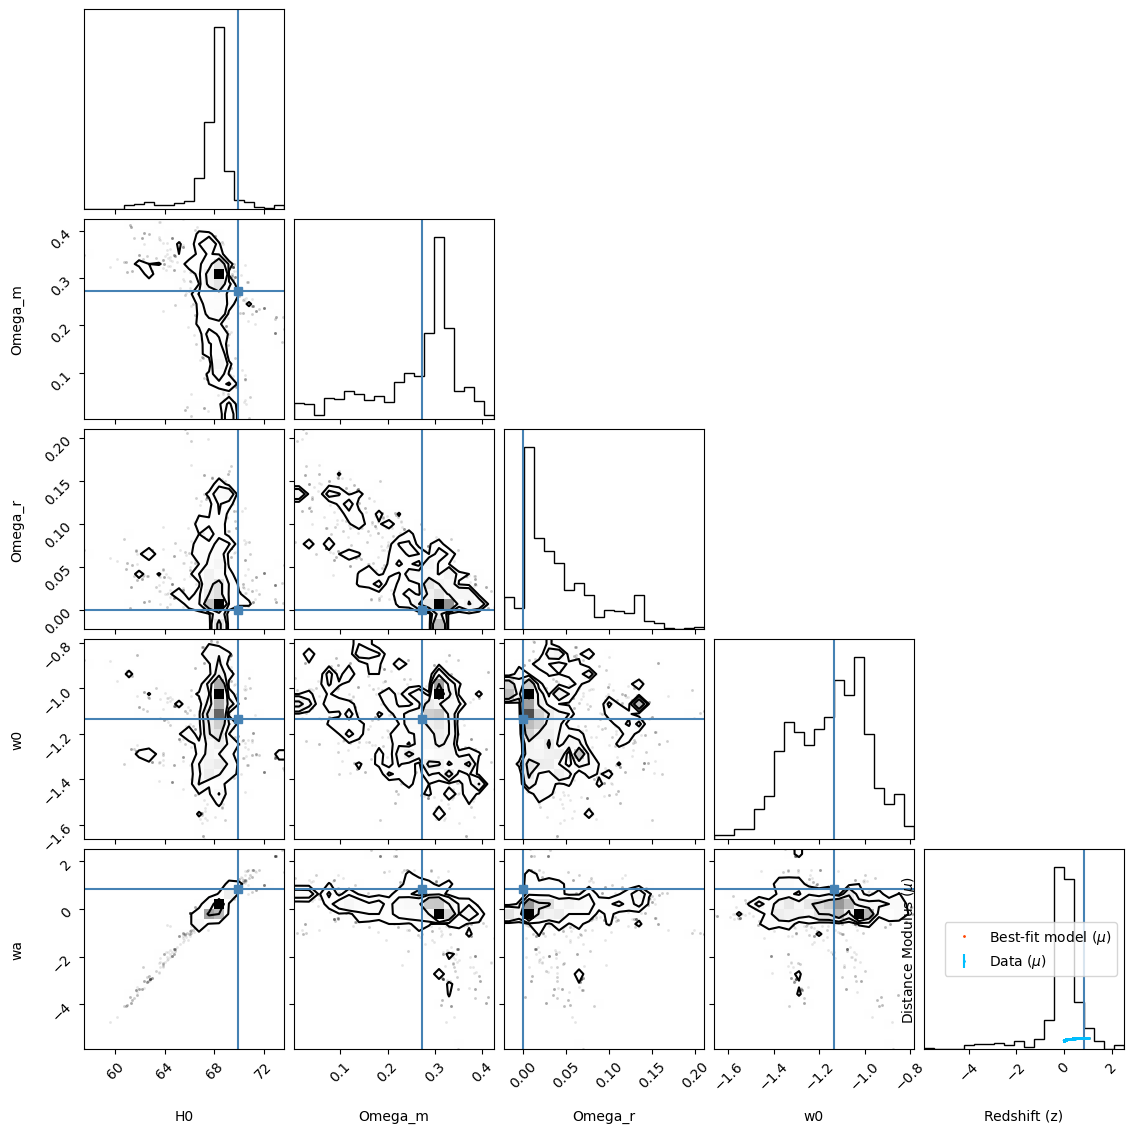

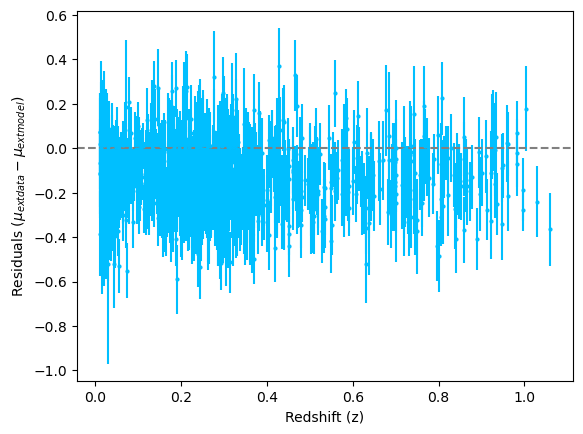

In [62]:
#plot the chains for each parameter
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
labels = ["H0", "Omega_m", "Omega_r", "w0", "wa"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(reshaped_samples[:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(reshaped_samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")
plt.show()

#plot the corner plot
import corner
fig = corner.corner(reshaped_samples, labels=labels, truths=best_fit_params)
#plt.show()

#plot the best fit model
best_fit_params_mcmc = np.mean(reshaped_samples, axis=0)
mu_model_best_mcmc = get_mu(z_data, *best_fit_params_mcmc)

plt.errorbar(z_data, mu_data, yerr=dmb, fmt='o', markersize=1, color='deepskyblue', label='Data ($\mu$)')
plt.plot(z_data, mu_model_best_mcmc, 'o', markersize=1, color='orangered', label='Best-fit model ($\mu$)')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus ($\mu$)')
plt.legend()
plt.show()

#plot the residuals
residuals_mcmc = mu_data - mu_model_best_mcmc
plt.errorbar(z_data, residuals_mcmc, yerr=dmb, fmt='o', markersize=2, color='deepskyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Redshift (z)')
plt.ylabel('Residuals ($\mu_{\text{data}} - \mu_{\text{model}}$)')
plt.show()